In [1]:
import pandas as pd
import numpy as np
from sklearn. preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import SCORERS, accuracy_score as acc, f1_score as f1
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [2]:
df_bank = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv', sep=';')

In [3]:
#df_bank

In [4]:
df_bank.drop('duration', axis = 1, inplace = True )

In [5]:
df_bank = df_bank.dropna(how='all')

In [6]:
df_bank[["y"]] = df_bank[["y"]].apply(LabelEncoder().fit_transform)

In [7]:
dummy = pd.get_dummies(df_bank)

In [8]:
dummy.isna().sum()

age                     0
campaign                0
pdays                   0
previous                0
emp.var.rate            0
                       ..
day_of_week_tue         0
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
Length: 63, dtype: int64

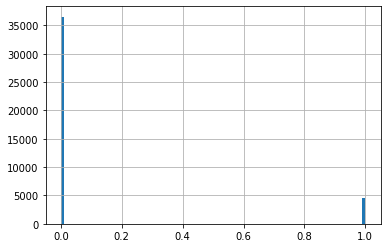

In [9]:
dummy['y'].hist(bins=100)

In [10]:
#X = df_bank['Type']
X = dummy.drop('y', axis=1)
print(X)
y = dummy['y']
print(y)

       age  campaign  ...  poutcome_nonexistent  poutcome_success
0       56         1  ...                     1                 0
1       57         1  ...                     1                 0
2       37         1  ...                     1                 0
3       40         1  ...                     1                 0
4       56         1  ...                     1                 0
...    ...       ...  ...                   ...               ...
41183   73         1  ...                     1                 0
41184   46         1  ...                     1                 0
41185   56         2  ...                     1                 0
41186   44         1  ...                     1                 0
41187   74         3  ...                     0                 0

[41188 rows x 62 columns]
0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64


In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = .2, random_state = 50)

In [12]:
cv = StratifiedKFold(n_splits=10, random_state=50, shuffle=True)
clf = RandomForestClassifier(n_estimators=100, max_depth=3)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
scores = cross_val_score(clf, x_train, y_train, cv=cv, n_jobs=-1, scoring='accuracy', verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.9s finished


In [14]:
scores

array([0.89559939, 0.90288316, 0.89984825, 0.89256449, 0.89924127,
       0.90197269, 0.89590288, 0.89984825, 0.89742033, 0.89742033])

In [15]:
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [16]:
dummyClf = DummyClassifier(strategy='stratified')
dummyClf.fit(x_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [17]:
dummy_score = cross_val_score(dummyClf, x_train, y=y_train, scoring='f1', cv=10)
dummy_score.mean()

0.11914448764843755

In [18]:
acc(y_test, dummyClf.predict(x_test))

0.7974022821073076

In [19]:
acc(y_test, clf.predict(x_test))

0.8991260014566642

In [20]:
params = { 
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8, 10],
    'criterion' :['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, scoring='accuracy', n_jobs=-1, verbose=10)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  4

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra